In [1]:
import pandas as pd


In [5]:
file_path = r"C:\Users\Dongen_Master\Desktop\L2T2\Dataset .csv"
df = pd.read_csv(file_path)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
# Count the number of restaurants per city
city_counts = df['City'].value_counts()

# Identify the city with the highest number of restaurants
city_with_most_restaurants = city_counts.idxmax()
num_restaurants = city_counts.max()

print(f"City with the highest number of restaurants: {city_with_most_restaurants} ({num_restaurants} restaurants)")


City with the highest number of restaurants: New Delhi (5473 restaurants)


In [9]:
# Group the data by city and calculate the average rating
average_ratings = df.groupby('City')['Aggregate rating'].mean()

# Display the average ratings for all cities
average_ratings.sort_values(ascending=False).head()


City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Name: Aggregate rating, dtype: float64

In [10]:
# Identify the city with the highest average rating
city_with_highest_rating = average_ratings.idxmax()
highest_rating = average_ratings.max()

print(f"City with the highest average rating: {city_with_highest_rating} ({highest_rating} rating)")


City with the highest average rating: Inner City (4.9 rating)


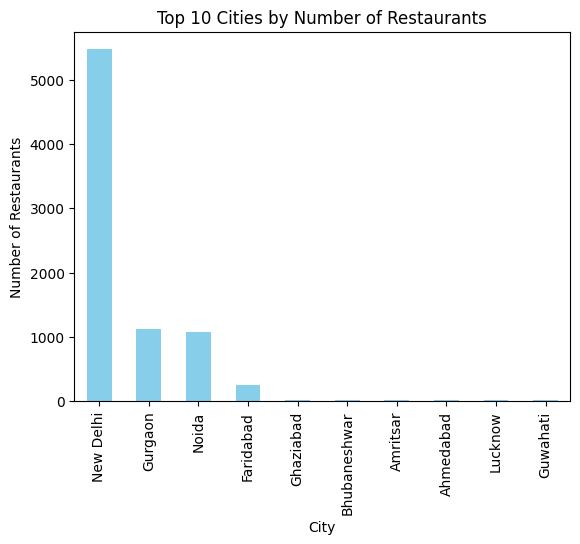

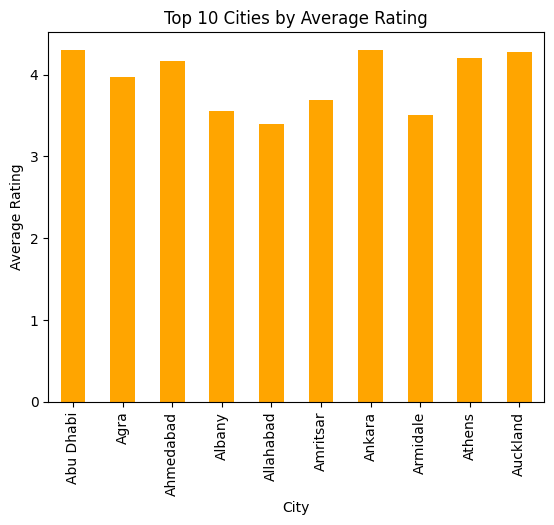

In [11]:
import matplotlib.pyplot as plt

# Bar chart for the number of restaurants per city
city_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()

# Bar chart for the average rating per city
average_ratings.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.show()
